## Basic Math & Calculus Review

In [1]:
import math
import numpy as np
import scipy
import sympy
import sklearn
import matplotlib.pyplot as plt

In [2]:
# PEMDAS (order of operations)
val = 2 * (3 + 2)**2 / 5 - 4
print(val)

6.0


In [3]:
# liberal use of parentheses (better!)
val = 2 * ((3 + 2)**2 / 5) - 4
print(val)

6.0


In [4]:
# the power of variables
variable_list = [1, 2, 3, 4, 5]
for variable in variable_list:
    product = 3 * variable
    print(product)

3
6
9
12
15


In [5]:
# linear function by output values
def f(x):
    return 2*x + 1

x_values = [0, 1, 2, 3]

for x in x_values:
    y = f(x)
    print(y)

1
3
5
7


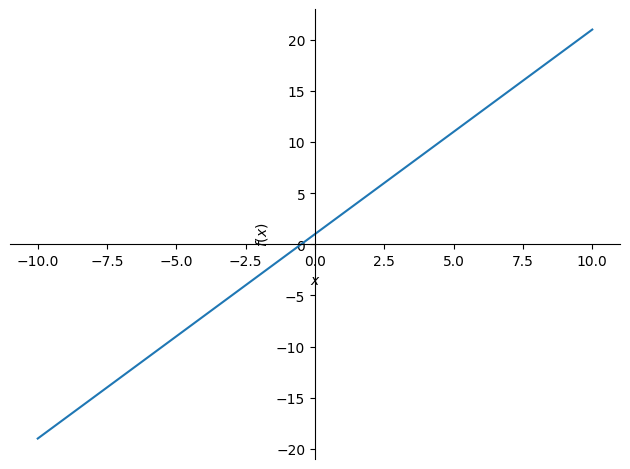

In [6]:
# linear function by plot
x = sympy.symbols('x')
f = 2*x + 1
sympy.plot(f);

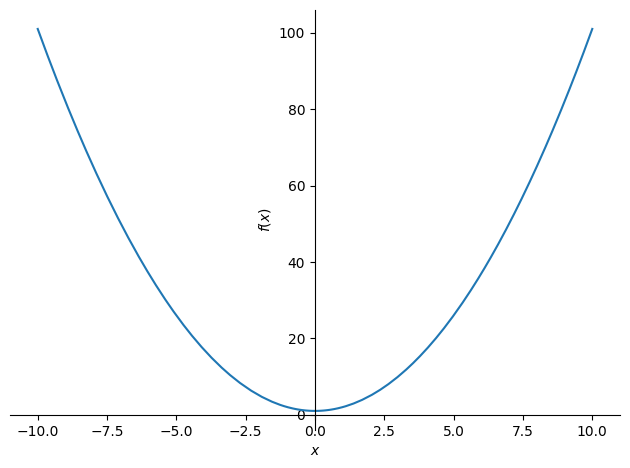

In [7]:
# exponential / quadratic / curvilinear function by plot
x = sympy.symbols('x')
f = x**2 + 1
sympy.plot(f);

Curvilinear functions can be more mathematically difficult to work with than linear functions
- Non-constant rate of change means it is more difficult to make predictions, and derivatives/integrals are more complex
- Complex behavior such as multiple valleys, peaks, or oscillations can cause challenges in understanding the function's behavior
- Limited analytical solutions since algebraic methods are often insufficient. Approximation techniques may be required
- Higher dimensional complexities may make it difficult to understand relationships between variables and outputs since there are more interactions between variables
- Non-intuitive transformations are harder to interpret geometrically or conceptually than for linear function transformations like scaling and translation.
- Sensitivity to initial conditions can cause large changes in output for small changes in input
- Lack of closed-form solutions

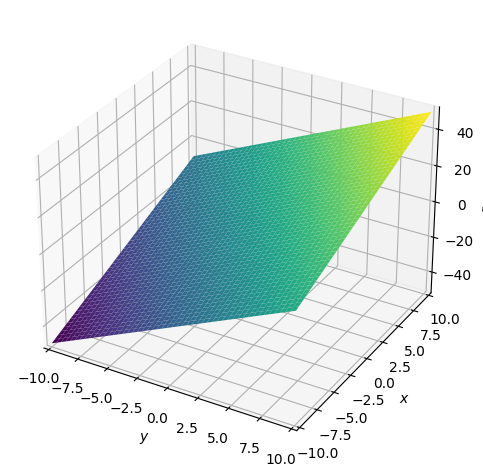

In [8]:
# multivariable function by plot
x, y = sympy.symbols('x y')
f = 2*x + 3*y
sympy.plotting.plot3d(f);

In [9]:
# summation in python
x = [1, 4, 6, 2]
n = len(x)
summation = sum(5*x[i] for i in range(n))
summation2 = sum(5*x)
print(summation, summation2)

65 65


In [10]:
# summation in SymPy
i, n = sympy.symbols('i n')
summation = sympy.Sum(2*i, (i, 1, n)) # function, (from 1 to n)
up_to_5 = summation.subs(n, 5) # "substitute" 5 for n
print(up_to_5) # execution does not happen automatically!
print(up_to_5.doit()) # execute expression

Sum(2*i, (i, 1, 5))
30


In [11]:
# using symbols for exponential expression in SymPy
x = sympy.symbols('x')
expr = x**2 / x**5
print(expr)

x**(-3)


In [12]:
# logarithms
x = math.log(8, 2)
print(x)

3.0


In [13]:
# euler's number (e)
n_ = 10
n_p = 7
n_lim = [n_**i for i in range(n_p)]
def expr(n):
    return (1+(1/n))**n
print('Approaching e:')
for n in n_lim:
    print(expr(n))
print('Math e')
print(math.e)

Approaching e:
2.0
2.5937424601000023
2.7048138294215285
2.7169239322355936
2.7181459268249255
2.7182682371922975
2.7182804690957534
Math e
2.718281828459045


In [14]:
# limits
x = sympy.symbols('x')
f = 1 / x
result = sympy.limit(f, x, 'oo')
print(result)

0


In [15]:
# evaluating e using limits
n = sympy.symbols('n')
f = (1 + (1/n))**n
result = sympy.limit(f, n, 'oo')

print(result) # SymPy recognizes Euler's number
print(result.evalf()) # display symbol as number

E
2.71828182845905


Identifying use of Euler's number in interest function:

$$ A = P (1 + {r \over n})^{nt} $$

$$ {r \over n} = {1 \over m}, n = rm $$

$$ A = P (1 + {1 \over m}^{mrt}) $$

$$ A = P [(1 + {1 \over m})^m]^{rt} $$

$$ e = (1 + {1 \over m})^m $$

$$ A = Pe^{rt} $$



In [16]:
# derivatives in SymPy
x = sympy.symbols('x')
f = x**2
dx_f = sympy.diff(f)
print(dx_f)
print(dx_f.subs(x, 2))

2*x
4


In [17]:
# partial derivatives (derivatives with multiple variables)
x, y = sympy.symbols('x y')
f = 2*x**3 + 3*y**3
df_x = sympy.diff(f, x)
df_y = sympy.diff(f, y)
print(f)
print(df_x)
print(df_y)

2*x**3 + 3*y**3
6*x**2
9*y**2


partial derivatives evaluate one variable at a time, and other variables are assumed constant

In [18]:
# chain rule
x, y = sympy.symbols('x y')
_y = x**2 + 1 # _y to prevent variable clash
dy_dx = sympy.diff(_y)
z = y**3 - 2
dz_dy = sympy.diff(z)
dz_dx_with_chain = (dy_dx * dz_dy).subs(y, _y) # chain rule
dz_dx_no_chain = sympy.diff(z.subs(y, _y)) # substitute, then take derivative
print('y:', _y)
print('z:', z)
print('dy/dx:', dy_dx)
print('dz/dy:', dz_dy)
print('by chain rule:', dz_dx_with_chain)
print('without chain rule:', dz_dx_no_chain)
print('Equations are equal? -->', dz_dx_no_chain.equals(dz_dx_with_chain))

y: x**2 + 1
z: y**3 - 2
dy/dx: 2*x
dz/dy: 3*y**2
by chain rule: 6*x*(x**2 + 1)**2
without chain rule: 6*x*(x**2 + 1)**2
Equations are equal? --> True


In [19]:
# integrals by equation
x = sympy.symbols('x')
f = x**2 + 1
area = sympy.integrate(f, (x, 0, 1))
print(area)

4/3


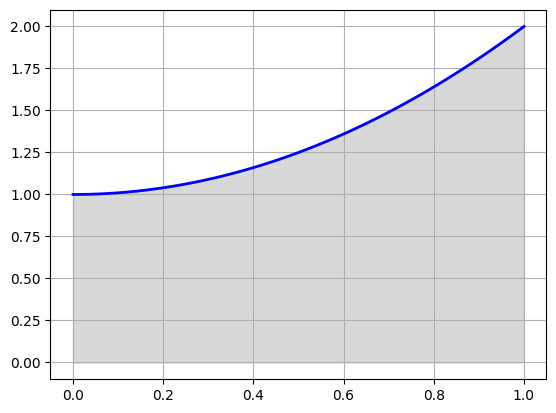

In [20]:
# integrals by plot
x = sympy.symbols('x')
f = x**2 + 1
integral = sympy.integrate(f, (x, 0, 1))
f_func = sympy.lambdify(x, f) # convert to callable function
x_vals = np.linspace(0, 1, 100) # generate x values for plotting
y_vals = f_func(x_vals) # evaluate at x values
plt.plot(x_vals, y_vals, 'b', linewidth=2, label='f(x) = x^2 + 1') # plot function
plt.fill_between(x_vals, y_vals, color='gray', alpha=0.3) # fill area
plt.grid(True)
plt.show();


In [21]:
# exercise 1
value = 62.6738
print(f'The value {value} is rational because it can be represented by a fraction.')
print(sympy.Rational(f"{value}"))

The value 62.6738 is rational because it can be represented by a fraction.
313369/5000


In [22]:
# exercise 2
x = sympy.symbols('x')
expr = x**7 * x**-5
print(expr)
print(expr.subs(x, 10))

x**2
100


In [23]:
# exercise 3
x = sympy.symbols('x')
expr = x**(1/2)
print(expr)
print(expr.subs(x, 81))

x**0.5
9.00000000000000


In [24]:
# exercise 4
x = sympy.symbols('x')
expr = x**(3/2)
print(expr)
print(expr.subs(x, 25))

x**1.5
125.000000000000


In [25]:
# exercise 5
p, r, n, t = sympy.symbols('p r n t')
f = p*((1+(r/n))**(n*t))
worth = f.subs([(p, 1000), (r, 0.05), (n, 12), (t, 3)])
print(worth)

1161.47223133347


In [26]:
# exercise 6
p, r, t = sympy.symbols('p r t')
f = p*sympy.E**(r*t)
worth = f.subs([(p, 1000), (r, 0.05), (t, 3)])
print(worth)

1161.83424272828


In [27]:
# exercise 7
x = sympy.symbols('x')
f = 3*x**2 + 1
df_dx = f.diff(x)
print(df_dx)
print(df_dx.subs(x, 3))

6*x
18


In [28]:
# exercise 8
x = sympy.symbols('x')
f = 3*x**2 + 1
integral = sympy.integrate(f, (x, 0, 2))
print(integral)

10
